# Linear Regression using Scikit-Learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
# plt.style.use('./deeplearning.mplstyle')

## Gradient Descent
### Load the data set

In [4]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### Scale/normalize the training data

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peek to Peek range by column in Raw        X:{np.ptp(X_train, axis=0)}")
print(f"Peek to Peek range by column in Normalized X:{np.ptp(X_norm, axis=0)}")

Peek to Peek range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peek to Peek range by column in Normalized X:[5.84 6.13 2.06 3.68]


### Create and fit the regression model

In [7]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


SGDRegressor()
number of iterations completed: 126, number of weight updates: 12601.0


### View parameters

In [8]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b: {b_norm}")
print(f"model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.19 -21.23 -32.41 -37.86], b: [362.27]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [9]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.61 295.61 485.79 389.73]
Target values 
[271.5 300.  509.8 394. ]


### Plot Results

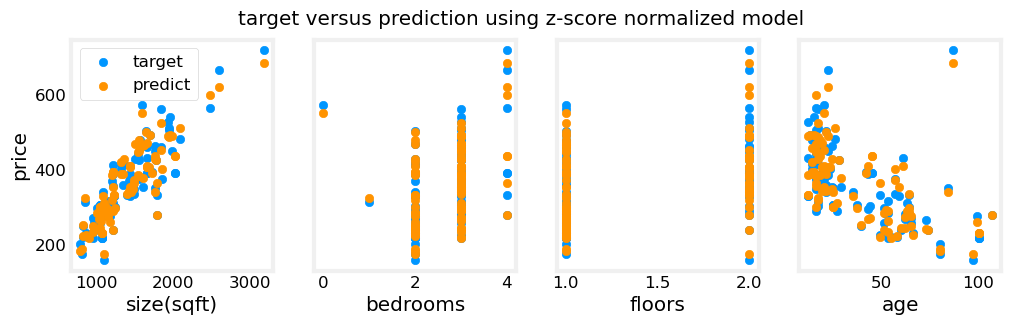

In [10]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1, 4, figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"],label='predict')
ax[0].set_ylabel("price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()